#Parte I – Questões Teóricas

## Exercício 1 – Aprendizado Supervisionado

- O que caracteriza um problema de aprendizado supervisionado?
- Qual é a principal diferença entre um problema de regressão e um problema de classificação?
- Dê um exemplo realista de problema de regressão e um de classificação.


R:
- Um problema de aprendizado supervisionado é um problema concreto, existente no mundo real, em que buscamos uma resposta através do aprendizado de máquina. Dados são alimentados a um modelo de ML e uma resposta (target) é esperada em troca. Nos dados usados para treinamento, cada instância existente tem seu rótulo correspondente, e o modelo vai tentar prever qual é aquele rótulo com base nos padrões observados nos dados. Depois, usando o padrão aprendido, tenta aplicá-lo nos dados de teste (dados não vistos antes).
- Problemas de classificação são caracterizados como aqueles em que o modelo tenta prever uma classe pré-definida, podendo ser ela uma classe binária (classificação binária) ou várias classes diferentes (classificação multiclasses). Como exemplo de classificação multiclasses, podemos citar a classificação de diferentes espécies de felinos com bases em suas características físicas (tamanho, peso, tamanho das garras e do focinho, padrão de pelugem, etc).
- Já problemas de regressão são problemas em que a resposta é um valor numérico contínuo. Por exemplo, tentar prever quantos sorvetes uma sorveteria vende em um dia dados a temperatura, a umidade, o vento e se está chovendo ou não.

## Exercício 2 – Métricas de Avaliação

- Existe uma métrica universalmente melhor para avaliar modelos de aprendizado supervisionado? Justifique.
- Por que não se deve utilizar uma métrica típica de regressão (ex: MSE) em um problema de classificação (e vice-versa)?
- Escolha uma métrica de regressão e uma de classificação que você estudou e explique em que situação cada uma é mais relevante.


R:
- Não, não há uma métrica universalmente melhor do que todas as outras, especialmente porque tipos diferentes de problemas exigem métricas particulares para avaliação do desempenho do modelo. Por causa de como elas são calculadas, algumas métricas são melhor adaptadas para tipos particulares de problemas. Ex: F1-Score para problemas de classificação com datasets desbalanceados.
- Porque as métricas servem para testar o desempenho de cada modelo. Num problema de regressão, queremos tentar prever um valor numérico contínuo, porém as chances do modelo acertar o valor 100% corretamente são praticamente nulas. Desta forma, as métricas de regressão são formas de estimar O QUANTO o modelo errou. Obviamente, melhores modelos têm margem de erro menores. Já em modelos de classificação, as métricas medem o quanto o modelo acertou em suas previsões, pois dada a natureza do problema, apenas dois desfechos são possíveis: ou o modelo acertou sua previsão, ou ele errou. Desta forma, as métricas medem o quanto ele conseguiu acertar.
- Métrica de regressão: MAPE (Erro Percentual Médio Absoluto) - uma boa métrica para usarmos quando queremos uma melhor interpretabilidade dos resultados, visto que seu valor é uma porcentagem.
- Métrica de classificação: F1-Score. Uma métrica mais relevantes em problemas onde temos um dataset desbalanceado e quando procuramos um equilíbrio entre sensibilidade e precisão, visto que o cálculo da métrica é uma média harmônica entre esses dois valores.

## Exercício 3 – Conjuntos de Dados e Generalização

- Por que é importante dividir os dados em conjuntos de treino e teste?
- O que significa generalização em um modelo de aprendizado?
- O que pode acontecer se um modelo for muito ajustado aos dados de treino?
- Quais práticas podem ajudar a detectar ou evitar esse tipo de situação?


R:
- É importante dividirmos o conjunto de dados em treino e teste pois temos que avaliar a capacidade do modelo em aplicar os padrões aprendidos durante a fase de treinamento para dados não vistos antes, pois no mundo real não temos rótulos para os dados. Dessa forma, precisamos testar o modelo em um ambiente controlado de forma com que podemos avaliar seu desempenho e iterativamente ajustar seus hiperparâmetros de forma a atingir um desempenho satisfatório. Quanto o desempenho no conjunto de teste atinge a meta estipulada, o modelo está pronto para ser aplicado no mundo real. Se não realizarmos esta divisão em treino e teste, e treinamos o modelo no conjunto total, ocorre o vazamento de dados, em que o modelo tem acesso aos rótulos do conjunto que seria de teste, o que causa um falseamento positivo das métricas de avaliação.
- Generalização é o conceito mencionado acima de o modelo conseguir aplicar o que ele aprendeu durante a fase de treinamento em novos dados com uma alta consistência. Ou seja, a capacidade dele aplicar em dados reais o padrão que aprendeu durante o seu treinamento e obter uma alta taxa de acertos (ou uma margem pequena de erros, dependendo de qual modelo).
- Se o modelo for muito ajustado aos dados de treino, pode acontecer o que chamamos de *overfitting*, que é o evento em que o modelo está tão ajustado aos dados de treino que ele perde a capacidade de aplicar o que ele "entendeu" a novos dados. Basicamente ele "decorou" os dados de treino, então não consegue aplicar o que aprendeu em dados não vistos, pois ele não aprendeu muita coisa.
- Para evitarmos isso, procuramos reduzir a complexidade do modelo, regularizar as features para uma mesma escala ou aumentar o volume de dados. Temos uma ideia de que o modelo está sobreajustado quando ele tem uma performance muito boa durante o período de treinamento porém tem um desempenho ruim quando usado em dados novos.  

# Parte II – Prática com o Dataset de Custos Médicos

# Exercício 4 – Realize uma análise exploratória completa sobre os dados

- Exiba as primeiras linhas do dataset.
- Investigue os tipos de variáveis presentes e comente sobre o tipo do problema.
- Apresente estatísticas descritivas para variáveis numéricas.
- Investigue relações entre variáveis por meio de visualizações (ex: dispersões, histogramas, boxplots).
- Discuta quais variáveis aparentam influenciar a variável alvo `charges`.


In [1]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

# Variáveis:
'''
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- TARGET - charges: Individual medical costs billed by health insurance'''

df = pd.read_csv(path + '/insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
    import sys
    !{sys.executable} -m pip install -U ydata-profiling[notebook]
    !pip install jupyter-contrib-nbextensions

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━

In [4]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Análise Geral")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 37.43it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Temos um problema de regressão em nossas mãos, em que tentamos prever o custo do plano de saúde de uma pessoa americana com base na sua idade, sexo, IMC, o número de filhos/dependentes cobertos pelo plano, se é fumante ou não e de qual região dos EUA ela é (sudeste, nordeste, etc). O custo está evidenciado na coluna 'charges', e ela é o nosso target. Em uma primeira análise, podemos evidenciar a presença de três variáveis categóricas: 'sex', 'smoker' e 'region'.

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


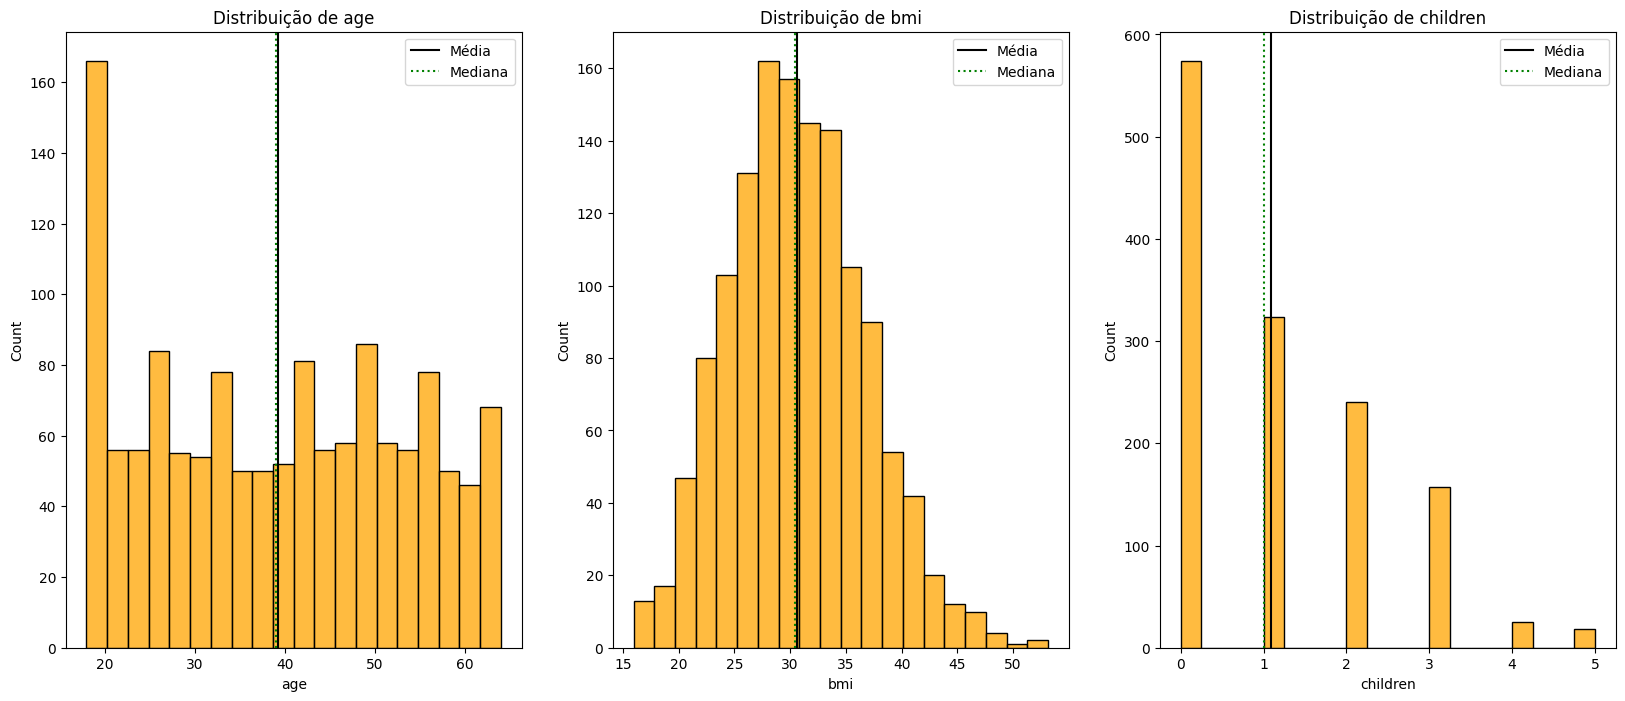

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#avaliando a distribuição das variáveis numéricas
numeric_cols = ['age', 'bmi', 'children']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.histplot(df[col], bins=20, ax=ax, color='orange')
    ax.axvline(df[col].mean(), color='black', linestyle='-', label='Média')
    ax.axvline(df[col].median(), color='green', linestyle=':', label='Mediana')
    ax.set_title(f'Distribuição de {col}')
    ax.legend()

plt.show()

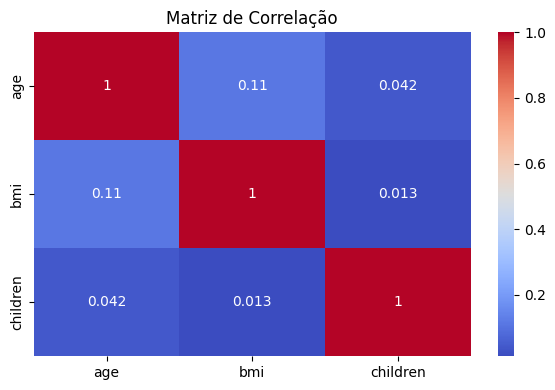

In [7]:
# Correlação entre as variáveis numéricas
plt.figure(figsize=(6, 4))
sns.heatmap(df[numeric_cols].corr(method='pearson'), annot=True, cmap='coolwarm', )
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

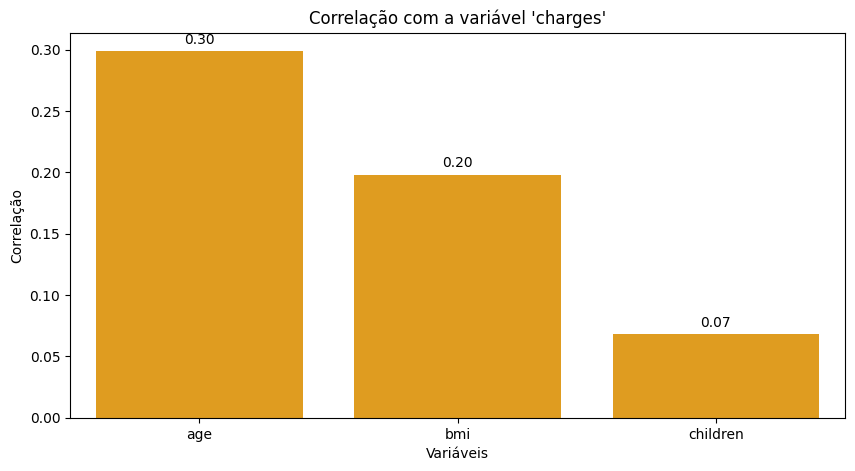

In [8]:
# Calculando a correlação das variáveis numéricas com o target
correlations = df.corr(numeric_only=True, method='pearson')['charges'].drop('charges')

plt.figure(figsize=(10, 5))
barplot = sns.barplot(x=correlations.index, y=correlations.values, color='orange')
barplot.bar_label(barplot.containers[0], fmt='%.2f', padding=3)
plt.title("Correlação com a variável 'charges'")
plt.ylabel("Correlação")
plt.xlabel('Variáveis')
plt.show()

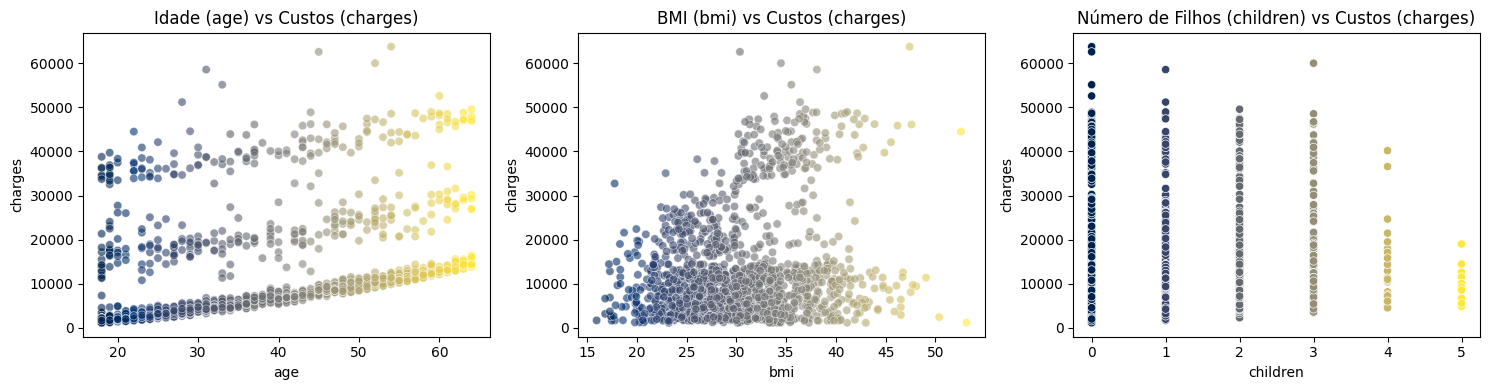

In [9]:
# Scatter plots individuais
plt.figure(figsize=(15, 4))

# age vs charges
plt.subplot(1, 3, 1)
sns.scatterplot(hue='age', x='age', y='charges', data=df, alpha=0.6, palette='cividis', legend=False)
plt.title('Idade (age) vs Custos (charges)')

# bmi vs charges
plt.subplot(1, 3, 2)
sns.scatterplot(hue='bmi', x='bmi', y='charges', data=df, legend=False, alpha=0.6, palette='cividis')
plt.title('BMI (bmi) vs Custos (charges)')

# children vs charges
plt.subplot(1, 3, 3)
sns.scatterplot(hue='children', x='children', y='charges', data=df, legend=False, palette='cividis')
plt.title('Número de Filhos (children) vs Custos (charges)')

plt.tight_layout()
plt.show()

A idade parece ter uma relação praticamente linear com o nosso target (quanto mais velho, maior o valor do plano). Esta variável apresenta a correlação mais relevante com o target. O IMC tem uma correlação intermediária, com um comportamento aproximando-se com uma curva normal - pessoas com IMC entre 30 e 40 pagando mais quando comparados com as outras pessoas (os extremos da curva). Já o número de dependentes tem a correlação mais fraca, só que com aparente relação inversa: pessoas com 0 ou 1 filhos pagando mais do que pessoas com 4 ou mais depensentes. Se houver 4 ou mais dependentes, mais barato a pessoa pagará de plano (ao menos é o que o gráfico mostra, contrariando o bom senso). Porém, como já dito anteriormente, essa correlação é bem fraca, então o número de dependentes não é um fator tão relevante na hora de estimar o preço do plano de saúde. A idade e o IMC são variáveis bem mais relevantes.

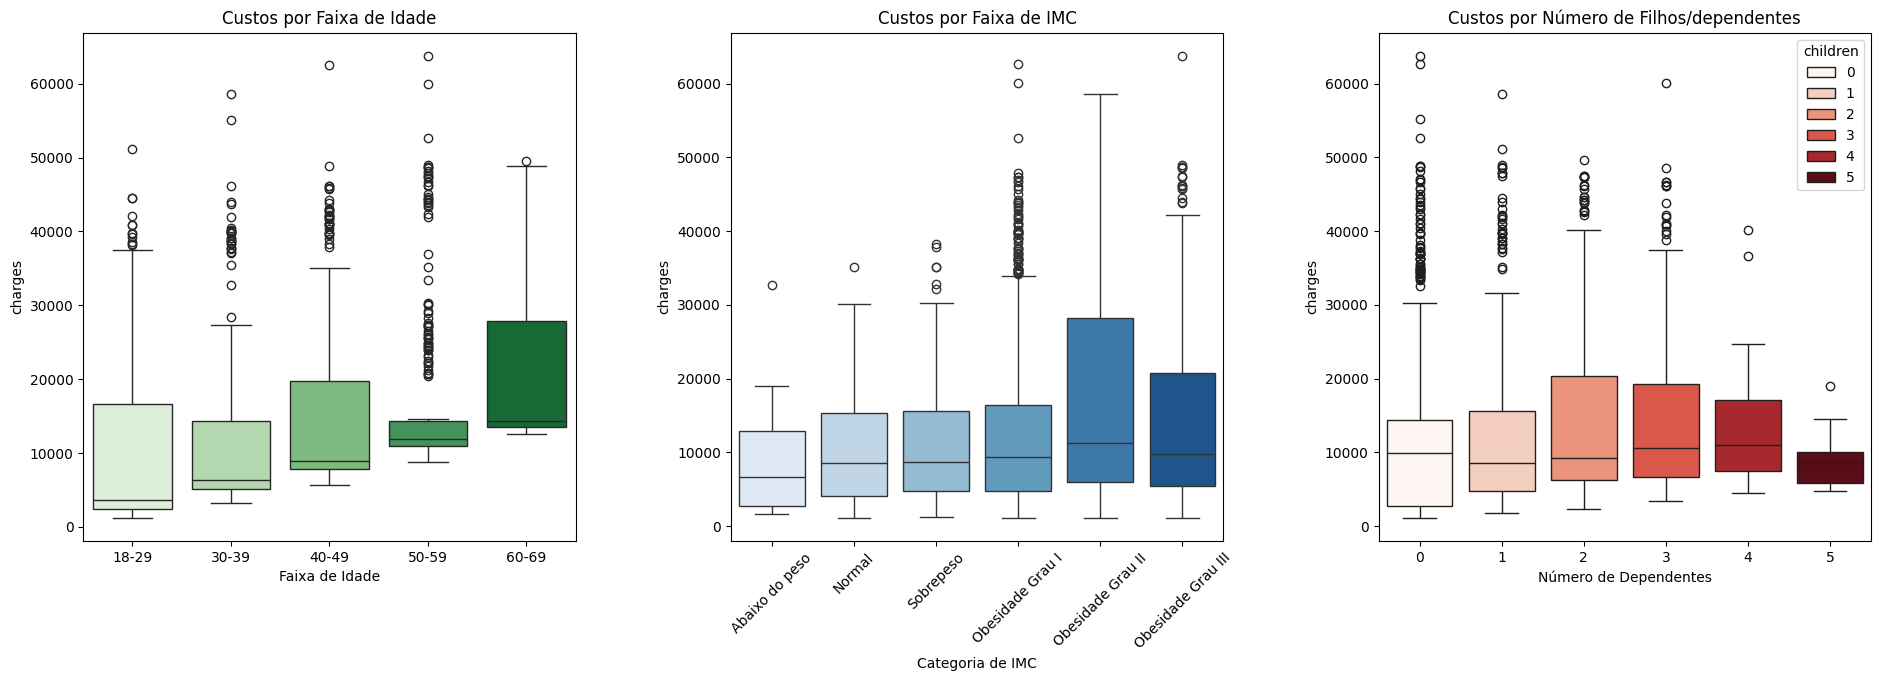

In [10]:
# Boxplots individuais
plt.figure(figsize=(20, 8))

# Gráfico 1 - Idade vs Charges
df['age_group'] = pd.cut(df['age'],
                        bins=[18, 30, 40, 50, 60, 70],
                        labels=['18-29',
                               '30-39',
                               '40-49',
                               '50-59',
                               '60-69',
                               ])
plt.subplot(1, 3, 1)
sns.boxplot(x='age_group', y='charges', hue='age_group', data=df, palette='Greens', legend=False)
plt.title('Custos por Faixa de Idade')
plt.xlabel('Faixa de Idade')
plt.ylabel('charges')

#Gráfico 2 - IMC vs Charges
df['bmi_group'] = pd.cut(df['bmi'],
                        bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')],
                        labels=['Abaixo do peso',
                                'Normal',
                                'Sobrepeso',
                                'Obesidade Grau I',
                                'Obesidade Grau II',
                                'Obesidade Grau III'])
plt.subplot(1, 3, 2)
sns.boxplot(x='bmi_group', y='charges', hue='bmi_group', data=df, palette='Blues', legend=False)
plt.title('Custos por Faixa de IMC')
plt.xlabel('Categoria de IMC')
plt.ylabel('charges')
plt.xticks(rotation=45)

# Gráfico 3 - Dependentes vs. Charges
plt.subplot(1, 3, 3)
sns.boxplot(x='children', y='charges', hue='children', data=df, palette='Reds')
plt.title('Custos por Número de Filhos/dependentes')
plt.xlabel('Número de Dependentes')
plt.ylabel('charges')

plt.tight_layout(pad=5.0)
plt.show()

Analisando os boxplots, pacientes com idade entre 50 a 59 anos têm que pagar valores bem acima do que seria esperado, destoando bastante das outras faixas de idade - outliers? Maior risco de morbimortalidade nessa faixa? Vemos também que indivíduos com IMC na faixa de obesidade grau II têm uma grande dispersão, com valores a serem pagos bastante variantes - consequentemente, com um desvio padrão bem grande.

## Exercício 5 – Pré-processamento de Dados

- Trate os dados faltantes, se existirem.
- Aplique a transformação adequada para variáveis categóricas.
- Normalize ou padronize os dados, justificando a necessidade disso.
- Faça uma análise de correlação entre as features e `charges` para auxiliar na seleção de atributos.
- Separe o dataset em conjunto de treino e teste (80/20), garantindo a aleatoriedade.


In [11]:
#checando por dados faltantes
df = df.drop(['age_group', 'bmi_group'], axis=1)
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Ótimo, não temos dados faltantes. Passemos para a próxima etapa.

In [12]:
#agora vamos processar as variáveis categóricas
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['sex', 'smoker', 'region']

encoder = OneHotEncoder(sparse_output=False)

encoded_data = encoder.fit_transform(df[categorical_cols])

feature_names = encoder.get_feature_names_out(categorical_cols)

df_encoded = pd.DataFrame(encoded_data, columns=feature_names)

numeric_cols = df.columns.difference(categorical_cols)
df_final = pd.concat([df[numeric_cols], df_encoded], axis=1)

df_final

,age,bmi,charges,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1725.55230,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,4449.46200,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,21984.47061,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,3866.85520,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,2205.98080,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,1629.83350,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,2007.94500,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


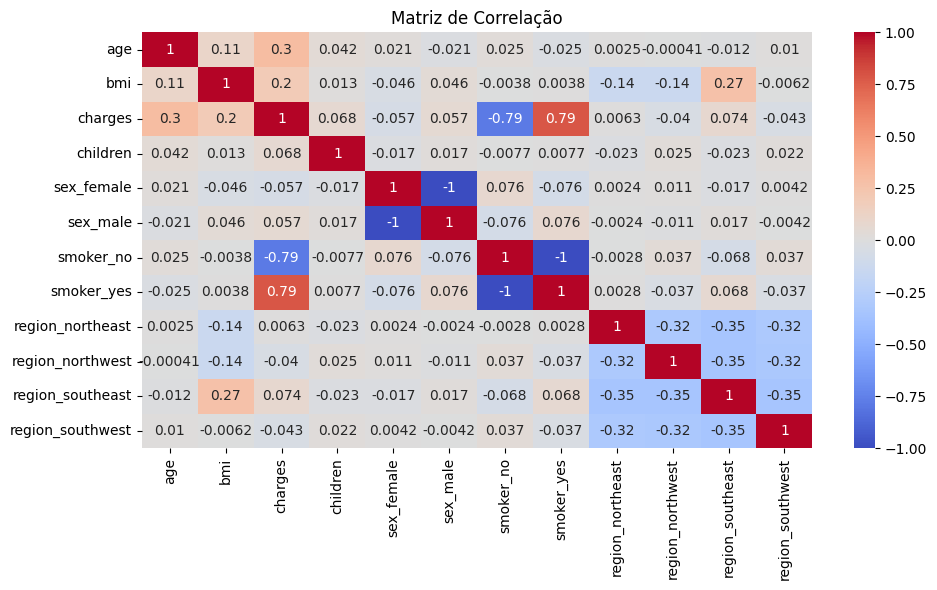

In [13]:
# Correlação entre todas as variáveis
plt.figure(figsize=(10, 6))
sns.heatmap(df_final.corr(method='pearson'), annot=True, cmap='coolwarm', )
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

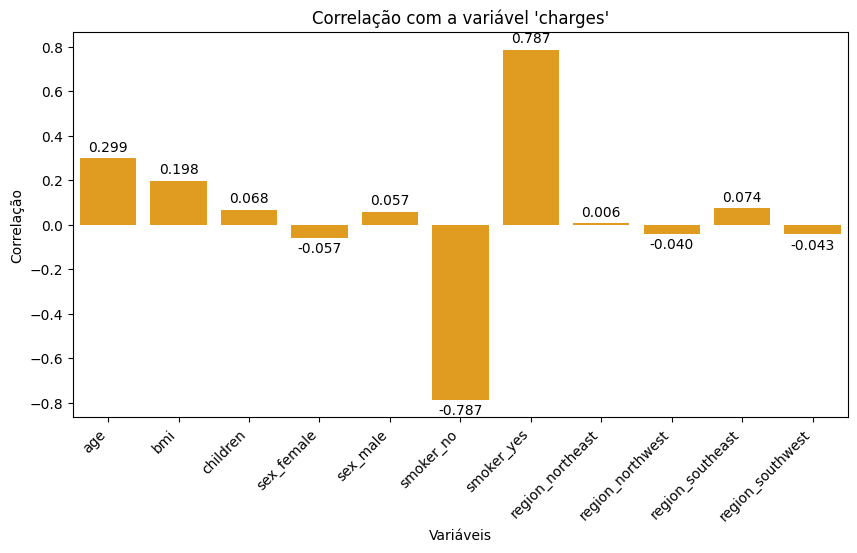

In [14]:
# Calculando a correlação de todas as variáveis com o target
correlations = df_final.corr(numeric_only=True, method='pearson')['charges'].drop('charges')

plt.figure(figsize=(10, 5))
barplot = sns.barplot(x=correlations.index, y=correlations.values, color='orange')
barplot.bar_label(barplot.containers[0], fmt='%.3f', padding=3)
plt.xticks(rotation=45, ha='right')
plt.title("Correlação com a variável 'charges'")
plt.ylabel("Correlação")
plt.xlabel('Variáveis')
plt.show()

A variável com maior correlação com o target é 'smoker', o que faz sentido: ser fumante é um fator de risco enorme para complicações de saúde, então obviamente o valor do plano será mais alto para estas pessoas. A região de moradia do paciente e o sexo têm correlações bem baixas, o que significa que estas duas variáveis (juntamente com o número de dependentes já mencionado anteriormente)não têm um impacto relevante no target.

In [15]:
#dividindo e padronizando os dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

X = df_final.drop('charges', axis=1)
y = df_final['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 0.27083333, -1.23744912,  0.5       , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.3125    , -0.71038746, -0.5       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.52083333, -0.64525856, -0.5       , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.77083333, -0.6072667 , -0.5       , ...,  0.        ,
         0.        ,  0.        ],
       [-0.10416667,  2.09739183,  0.5       , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.64583333, -0.03738881, -0.5       , ...,  0.        ,
         0.        ,  1.        ]])

Optei por utilizar o RobustScaler para padronização dos dados por conta da quantidade expressiva de outliers (especialmente no grupo de pacientes com idade entre 50-59 anos), como evidenciado nos boxplots anteriores. Dessa maneira, evitamos que variáveis de grandezas distintas influenciem o modelo de forma diferente e tratamos os outliers de forma com que não tenham um "peso" maior do que as outras instâncias durante o treinamento do modelo.

## Exercício 6 – Modelagem de Regressão

- Treine um modelo de regressão linear e um de regressão polinomial (grau 2 ou 3).
- Treine também um modelo KNN Regressor com diferentes valores de `k`.
- Compare os modelos com base nas métricas: MAE, MSE, RMSE e R².
- Visualize os valores previstos vs. valores reais para ao menos um modelo.
- Discuta qual modelo teve melhor desempenho e se há indícios de overfitting/underfitting.


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

#Modelo regressão linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
MAE_linear = mean_absolute_error(y_test, y_pred)
MSE_linear = mean_squared_error(y_test, y_pred)
RMSE_linear = root_mean_squared_error(y_test, y_pred)
R2_linear = r2_score(y_test, y_pred)
print(f'Modelo Regressão linear: \nMAE: {MAE_linear}\nMSE: {MSE_linear}\nRMSE: {RMSE_linear}\nR2: {R2_linear}')

#Modelo polinomial
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
MAE_poly = mean_absolute_error(y_test, y_pred_poly)
MSE_poly = mean_squared_error(y_test, y_pred_poly)
RMSE_poly = root_mean_squared_error(y_test, y_pred_poly)
R2_poly = r2_score(y_test, y_pred_poly)
print(f'\nModelo Regressão polinomial (grau 2): \nMAE: {MAE_poly}\nMSE: {MSE_poly}\nRMSE: {RMSE_poly}\nR2: {R2_poly}')

#Modelo KNN - com teste de vários valores para k
for k in range(1, 20, 3):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    MAE_knn = mean_absolute_error(y_test, y_pred_knn)
    MSE_knn = mean_squared_error(y_test, y_pred_knn)
    RMSE_knn = root_mean_squared_error(y_test, y_pred_knn)
    R2_knn = r2_score(y_test, y_pred_knn)
    print(f'\nModelo KNN com k = {k}: \nMAE: {MAE_knn}\nMSE: {MSE_knn}\nRMSE: {RMSE_knn}\nR2: {R2_knn}')

Modelo Regressão linear: 
MAE: 4181.194473753651
MSE: 33596915.851361476
RMSE: 5796.284659276274
R2: 0.7835929767120722

Modelo Regressão polinomial (grau 2): 
MAE: 2729.5001336394425
MSE: 20712805.98791837
RMSE: 4551.1323852331925
R2: 0.866583090316484

Modelo KNN com k = 1: 
MAE: 3621.0369102947757
MSE: 45770324.45076917
RMSE: 6765.376889040933
R2: 0.7051806864316021

Modelo KNN com k = 4: 
MAE: 3401.4824202014925
MSE: 29427845.473223094
RMSE: 5424.743816368022
R2: 0.8104471116095242

Modelo KNN com k = 7: 
MAE: 3502.176642533582
MSE: 32614474.31224942
RMSE: 5710.908361394833
R2: 0.7899211542737943

Modelo KNN com k = 10: 
MAE: 3569.1733219701496
MSE: 33730288.40172295
RMSE: 5807.778267265629
R2: 0.7827338872426775

Modelo KNN com k = 13: 
MAE: 3680.3797868217566
MSE: 35298265.91748945
RMSE: 5941.23437658282
R2: 0.77263411057655

Modelo KNN com k = 16: 
MAE: 3755.8115841753734
MSE: 36098611.66437851
RMSE: 6008.212018926971
R2: 0.7674788623552049

Modelo KNN com k = 19: 
MAE: 3803.401

In [17]:
#montando comparação entre dois modelos (regressão linear e polinomial)
comparison = pd.DataFrame({'Regressão Linear': y_pred, 'Polinomial grau 2': y_pred_poly, 'Valores reais': y_test})
comparison

,Regressão Linear,Polinomial grau 2,Valores reais
764,8969.550274,11215.721336,9095.06825
887,7068.747443,6055.226537,5272.17580
890,36858.410912,33306.274449,29330.98315
1293,9454.678501,10833.801122,9301.89355
259,26973.173457,29082.430361,33750.29180
...,...,...,...
109,39061.500932,46682.909712,47055.53210
575,11761.499198,12570.205335,12222.89830
535,7687.563632,7463.293497,6067.12675
543,40920.291512,57476.477976,63770.42801


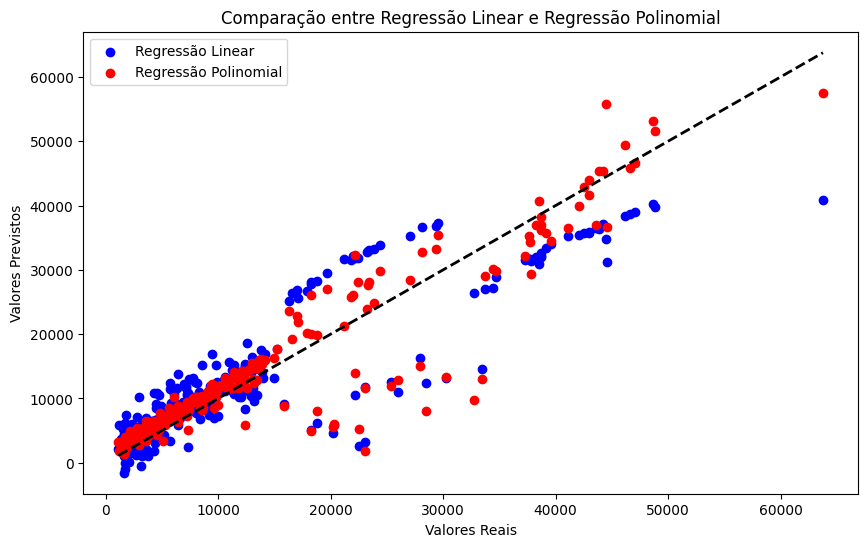

In [18]:
#visualização das predições
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Regressão Linear', color='blue')
plt.scatter(y_test, y_pred_poly, label='Regressão Polinomial', color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação entre Regressão Linear e Regressão Polinomial')
plt.legend()
plt.show()

O melhor modelo treinado foi o modelo de Regressão Polinomial de grau 2, pois é o que apresenta as menores margens de erro quando comparado aos valores reais. É o modelo com menores MAE, MSE, RMSE e maior R², o que se traduz para menores margens de erro e melhor desempenho que a média nas suas predições. Não há indícios de overfitting ou underfitting, pois o embora o desempenho tenha sido o melhor dentre os modelos, ainda assim há espaço para melhoras. Como os modelos conseguiram realizar as predições com um certo grau de aproximação, há de se inferir de que ele conseguiu captar algum padrão nos dados, o que reduz bastante as chances de underfitting. Também não obtivemos um desempenho muito discrepante quando comparamos o modelo de grau 2 com o restante dos modelos (lineares), visto que há maior risco de overfitting quando os dados são de maior complexidade. Os dois modelos têm um desempenho melhor na hora de prever pacientes de baixo custo, entretanto seus desempenhos pioram expressivamente na hora de estimar alto custos.

## Exercício 7 – Validação Cruzada na Regressão

- Escolha dois dos modelos anteriores (ex: regressão polinomial e KNN).
- Aplique validação cruzada com 5 dobras para cada modelo.
- Apresente as médias e desvios padrão das métricas de avaliação.
- Com base nos resultados, indique qual modelo apresenta maior estabilidade e melhor generalização.


In [19]:
from sklearn.model_selection import cross_validate
import numpy as np

#análise dos modelos em geral

scoring = {
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error',
    'RMSE': 'neg_mean_squared_error',
    'R2': 'r2'
}

linear_results = cross_validate(linear_model, X_train, y_train, cv=5, scoring=scoring)
poly_results = cross_validate(poly_model, X_train_poly, y_train, cv=5, scoring=scoring)

def format_results(results, model_name):
    return {
        'Modelo': model_name,
        'MAE': f"{-results['test_MAE'].mean():.3f} ± {results['test_MAE'].std():.3f}",
        'MSE': f"{-results['test_MSE'].mean():.3f} ± {results['test_MSE'].std():.3f}",
        'RMSE': f"{np.sqrt(-results['test_RMSE']).mean():.3f} ± {np.sqrt(-results['test_RMSE']).std():.3f}",
        'R²': f"{results['test_R2'].mean():.3f} ± {results['test_R2'].std():.3f}"
    }

comparison = pd.DataFrame([
    format_results(linear_results, 'Regressão Linear'),
    format_results(poly_results, 'Regressão Polinomial (grau 2)')
])

#análise de cada fold
def get_fold_metrics(results, model_name):
    folds = []
    for i in range(len(results['test_MAE'])):
        folds.append({
            'Modelo': model_name,
            'Fold': i+1,
            'MAE': -results['test_MAE'][i],
            'MSE': -results['test_MSE'][i],
            'RMSE': np.sqrt(-results['test_RMSE'][i]),
            'R2': results['test_R2'][i]
        })
    return pd.DataFrame(folds)

linear_folds = get_fold_metrics(linear_results, 'Regressão Linear')
poly_folds = get_fold_metrics(poly_results, 'Regressão Polinomial')

all_folds = pd.concat([linear_folds, poly_folds])

display(comparison)
display(all_folds)

,Modelo,MAE,MSE,RMSE,R²
0,Regressão Linear,4245.228 ± 244.718,37947891.049 ± 5031823.958,6147.094 ± 401.406,0.733 ± 0.049
1,Regressão Polinomial (grau 2),3010.717 ± 241.307,24447591.145 ± 5119381.397,4917.105 ± 519.298,0.827 ± 0.046


,Modelo,Fold,MAE,MSE,RMSE,R2
0,Regressão Linear,1,4349.374629,4.013183e+07,6334.969054,0.715855
1,Regressão Linear,2,4225.950334,3.207703e+07,5663.659111,0.802106
2,Regressão Linear,3,4118.374231,3.591019e+07,5992.511012,0.722961
3,Regressão Linear,4,4634.488691,4.659042e+07,6825.717407,0.657843
4,Regressão Linear,5,3897.951854,3.502998e+07,5918.613136,0.766786
0,Regressão Polinomial,1,2861.422760,2.474378e+07,4974.312260,0.824807
1,Regressão Polinomial,2,2780.230388,1.705982e+07,4130.353279,0.894752
2,Regressão Polinomial,3,3123.355405,2.594350e+07,5093.476196,0.799852
3,Regressão Polinomial,4,3433.564835,3.265282e+07,5714.265037,0.760200
4,Regressão Polinomial,5,2855.012629,2.183803e+07,4673.117844,0.854612


Com base na comparação das métricas, o modelo de regressão polinomial de grau 2 possui uma melhor capacidade de generalização (maior R² médio) e também uma maior estabilidade (menor desvio padrão no R²).

## Exercício 8 – Classificação Multiclasse com KNN
Transforme o problema de regressão em um problema de classificação com três categorias de custo.

- Crie uma nova coluna chamada faixa_custo com os rótulos baixo, médio e alto, dividindo a variável charges em três partes iguais (usando os tercis — ou seja, os 33% mais baixos, os 33% do meio, e os 33% mais altos).
- Verifique quantas observações ficaram em cada uma das três classes e comente se elas ficaram balanceadas.
- Treine um modelo de classificação KNN para prever a variável faixa_custo.
- Aplique validação cruzada para avaliar o modelo.
- Apresente as métricas de desempenho: acurácia, precisão macro, recall macro e F1-score.
- Exiba a matriz de confusão e discuta os principais erros cometidos pelo modelo


Número de instâncias:
faixa_custo
baixo    446
médio    446
alto     446
Name: count, dtype: int64

Métricas de desempenho (média ± DP nos 5 folds):
Acurácia: 0.728 ± 0.030
Precisão Macro: 0.727 ± 0.029
Recall Macro: 0.730 ± 0.030
F1-Score Macro: 0.719 ± 0.034


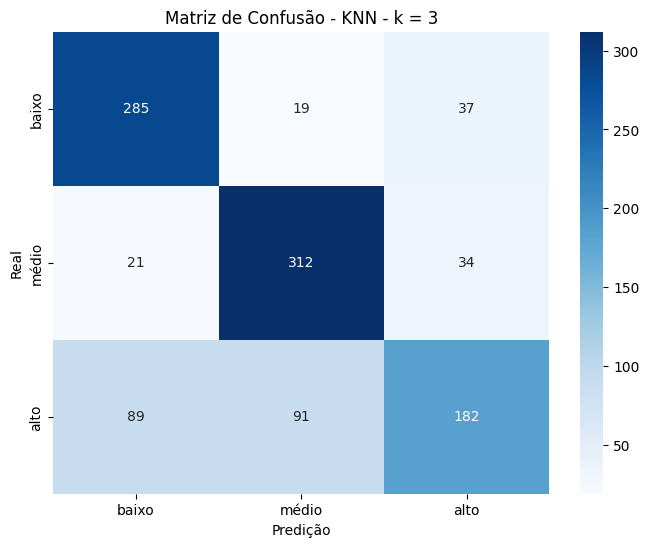

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, cross_val_predict, train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

#montando a nova coluna
df_final['faixa_custo'] = pd.qcut(df_final['charges'],
                            q=3,
                            labels=['baixo', 'médio', 'alto'])

print("Número de instâncias:")
print(df_final['faixa_custo'].value_counts(normalize=False))

X = df_final.drop(['charges', 'faixa_custo'], axis=1)
y = df_final['faixa_custo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
metrics = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro'
}

cv_results = cross_validate(knn, X_train, y_train, cv=5, scoring=metrics)

print("\nMétricas de desempenho (média ± DP nos 5 folds):")
print(f"Acurácia: {cv_results['test_accuracy'].mean():.3f} ± {cv_results['test_accuracy'].std():.3f}")
print(f"Precisão Macro: {cv_results['test_precision_macro'].mean():.3f} ± {cv_results['test_precision_macro'].std():.3f}")
print(f"Recall Macro: {cv_results['test_recall_macro'].mean():.3f} ± {cv_results['test_recall_macro'].std():.3f}")
print(f"F1-Score Macro: {cv_results['test_f1_macro'].mean():.3f} ± {cv_results['test_f1_macro'].std():.3f}")

#Matriz de confusão
y_pred = cross_val_predict(knn, X_train, y_train, cv=5)
cm = confusion_matrix(y_train, y_pred, labels=['baixo', 'médio', 'alto'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['baixo', 'médio', 'alto'],
            yticklabels=['baixo', 'médio', 'alto'])
plt.title('Matriz de Confusão - KNN - k = 3')
plt.ylabel('Real')
plt.xlabel('Predição')
plt.show()

O modelo apresenta um melhor desempenho quando tenta prever a classe 'média', acertando 312 instâncias (de 367) e erroneamente categorizando 110 instâncias de outras classes. O pior desempenho é quando tenta prever a classe 'alta': destes, acertou apenas 182 instâncias (de 362) e categorizou erroneamente 71 instâncias de outras classes.

## Exercício 9 – Classificação Binária: Comparando Modelos
Transforme o problema em uma tarefa de classificação binária, focando nos custos mais altos.

- Crie uma nova variável chamada custo_alto, que recebe valor 1 para os 33% com maior valor de charges (ou seja, aqueles com charges maior ou igual ao tercil superior) e 0 para os demais.
- Verifique se a nova variável está balanceada ou não.
- Treine dois modelos para prever a variável custo_alto: regressão logística e KNN.
- Avalie os dois modelos usando validação cruzada.
- Para cada modelo, apresente as métricas: acurácia, precisão, recall e F1-score.
- Exiba as matrizes de confusão dos dois modelos e compare os resultados.
- Comente qual modelo apresentou melhor desempenho e por que ele pode ser mais adequado para esse problema.


Distribuição de classes:
custo_alto
0    0.666667
1    0.333333
Name: proportion, dtype: float64

 -----Regressão Logística-----
Acurácia: 87.850%
Precisão: 99.573%
Recall: 64.365%
F1-Score: 78.188%


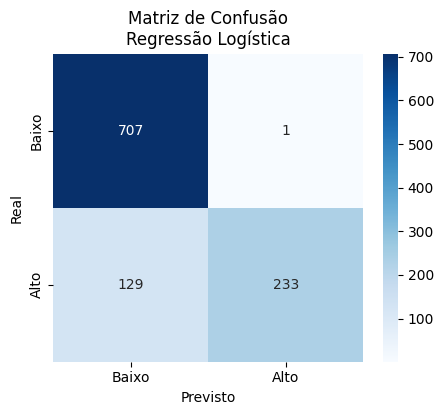


 -----KNN-----
Acurácia: 76.168%
Precisão: 77.436%
Recall: 41.713%
F1-Score: 54.219%


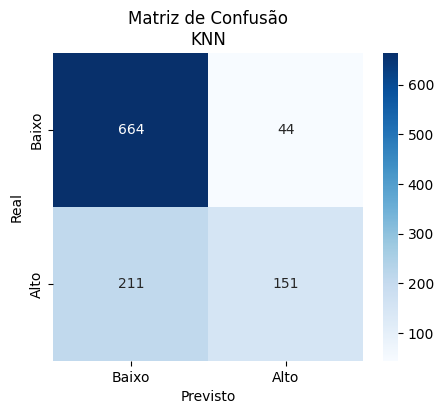

In [21]:
from sklearn.linear_model import LogisticRegression

#Montando a nova coluna
df_final['custo_alto'] = pd.cut(df_final['charges'],
                         bins=[-np.inf, df_final['charges'].quantile(0.6666), np.inf],
                         labels=[0, 1])

print("Distribuição de classes:")
print(df_final['custo_alto'].value_counts(normalize=True))

X = df_final.drop(['charges', 'faixa_custo', 'custo_alto'], axis=1)
y = df_final['custo_alto']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Regressão Logística': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    print(f"\n -----{name}-----")

    model.fit(X_train, y_train)

    y_pred = cross_val_predict(model, X_train, y_train, cv=5)

    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)

    print(f"Acurácia: {(accuracy*100):.3f}%")
    print(f"Precisão: {(precision*100):.3f}%")
    print(f"Recall: {(recall*100):.3f}%")
    print(f"F1-Score: {(f1*100):.3f}%")


    #Matriz de confusão
    cm = confusion_matrix(y_train, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Baixo', 'Alto'],
                yticklabels=['Baixo', 'Alto'])
    plt.title(f'Matriz de Confusão\n{name}')
    plt.ylabel('Real')
    plt.xlabel('Previsto')
    plt.show()

O melhor modelo dentre os dois testados foi a regressão logística (apresentou as maiores métricas). Ele foi mais adequado para esse problema pois provavelmente há uma relação linear entre os dados e é um modelo especialmente eficaz para classificações binárias, visto que calcula a probabilidade do evento ocorrer como função de outros fatores. Já o KNN se sairia melhor caso essa relação fosse não-linear.

## Exercício 10 – Curva ROC e AUC
Analise a capacidade dos modelos anteriores em separar as classes corretamente.

- Para cada modelo, gere a curva ROC e calcule a AUC.
- Compare visualmente as curvas e os valores de AUC dos dois modelos.
- Use a curva da regressão logística para experimentar diferentes valores de threshold (limiar de decisão).
- Mostre como a precisão e recall mudam quando você altera o threshold.
- Comente qual threshold parece ser mais equilibrado e justificável para esse cenário.



-----Regressão Logística-----
AUC (ROC): 0.906

-----KNN-----
AUC (ROC): 0.754


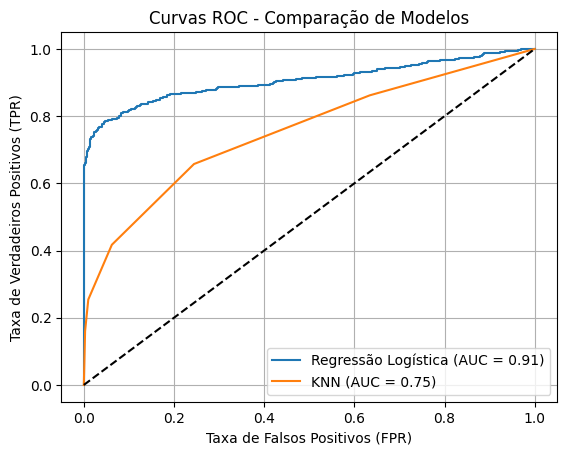

In [22]:
from sklearn.metrics import roc_curve, auc

roc_data = {}

for name, model in models.items():
    y_probs = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')[:, 1]

    fpr, tpr, thresholds = roc_curve(y_train, y_probs)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}
    print(f"\n-----{name}-----")
    print(f"AUC (ROC): {roc_auc:.3f}")

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

#Montando o gráfico
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curvas ROC - Comparação de Modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [23]:
#selecionando o modelo de regressão logística feito anteriormente
log_reg = next(iter(models.values()))
#print(log_reg)

y_probs = log_reg.predict_proba(X_test)[:, 1]

thresholds_to_test = [0.3, 0.4, 0.5, 0.6, 0.7]

results = []

for thresh in thresholds_to_test:
    y_pred = (y_probs >= thresh)
    results.append({
        'Threshold': thresh,
        'Acurácia': accuracy_score(y_test, y_pred),
        'Precisão': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
    })

results_df = pd.DataFrame(results).sort_values('Threshold')
display(results_df.round(3))

,Threshold,Acurácia,Precisão,Recall,F1-Score
0,0.3,0.881,0.777,0.869,0.820
1,0.4,0.910,0.917,0.786,0.846
2,0.5,0.896,1.000,0.667,0.800
3,0.6,0.888,1.000,0.643,0.783
4,0.7,0.888,1.000,0.643,0.783


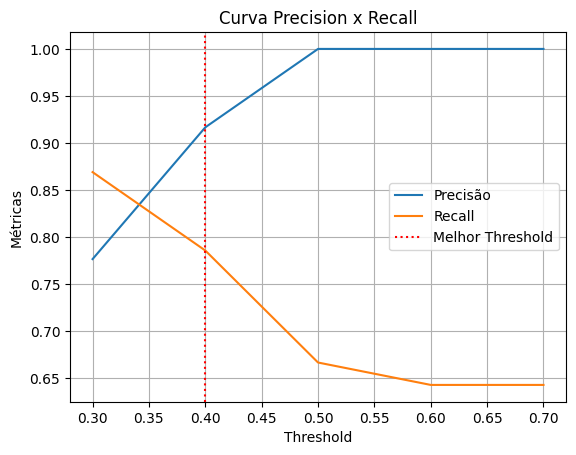

In [24]:
#Gráfico precision x recall

#pegando o maior f1
best_f1 = results_df.loc[results_df['F1-Score'].idxmax()]

#plotando o gráfico com marcação do melhor threshold (maior f1)
plt.plot(results_df['Threshold'], results_df['Precisão'], label='Precisão')
plt.plot(results_df['Threshold'], results_df['Recall'], label='Recall')
plt.axvline(x=best_f1['Threshold'], color='r', linestyle=':', label='Melhor Threshold')
plt.xlabel('Threshold')
plt.ylabel('Métricas')
plt.title('Curva Precision x Recall')
plt.legend()
plt.grid(True)
plt.show()

Para esse problema de classificação binária, onde não temos que pesar mais na eliminação de falsos positivos ou falsos negativos (pelo fato dos erros não serem tão relevantes assim), podemos buscar um equilíbrio entre essas métricas. Isso ocorre quando temos um maior valor de F1-Score. Desta forma, o melhor threshold é 0.4.

## Exercício 11 – Generalização: Comparando Treino e Teste

Para um dos modelos utilizados (regressão ou classificação), compare o desempenho entre o conjunto de treino e o conjunto de teste.

- Treine o modelo usando todo o conjunto de treino.
- Calcule as métricas no conjunto de treino e no conjunto de teste.
- Apresente os resultados lado a lado.
- Com base na diferença entre os desempenhos, discuta se há indícios de overfitting ou underfitting.
- Explique o que poderia ser feito para melhorar a capacidade de generalização do modelo.


In [25]:
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(X_train, y_train)

def calcular_metricas(X, y, modelo):
    y_pred = modelo.predict(X)
    return {
        'Acurácia': accuracy_score(y, y_pred),
        'Precisão': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred),
        'F1-Score': f1_score(y, y_pred)
    }

metricas_treino = calcular_metricas(X_train, y_train, modelo)
metricas_teste = calcular_metricas(X_test, y_test, modelo)

resultados = pd.DataFrame({
    'Treino': metricas_treino,
    'Teste': metricas_teste
}).round(3)
display(resultados)

,Treino,Teste
Acurácia,0.879,0.761
Precisão,0.936,0.700
Recall,0.691,0.417
F1-Score,0.795,0.522


O modelo teve um desempenho razoável quando utilizado nos dados de treino, porém não conseguiu reproduzir o comportamento nos dados de teste (as métricas ficaram bem piores), o que nos leva a crer que houve um overfitting do modelo nos dados de teste, visto que sua capacidade de generalização é bem ruim. Poderíamos testar o modelo com valores maiores de K, para que o modelo considerasse mais k-vizinhos e reduzisse a chance de overfitting.

##Exercício 12 – Interpretação de Métricas em Contexto

Considere um cenário prático: uma operadora de saúde quer identificar usuários com alto custo médico para oferecer programas de prevenção.

- Dentre as métricas que você obteve com os modelos de classificação, qual delas seria mais importante nesse contexto?
- Justifique com base no impacto real de errar um paciente de alto custo (falso negativo) ou errar um paciente de baixo custo (falso positivo).
- Com base na matriz de confusão do seu melhor modelo, discuta se ele seria aceitável para esse cenário.
- Que mudanças no pipeline (ex: balanceamento de classes, escolha de modelo, ajuste de threshold) poderiam ajudar a melhorar essa aplicação?


Neste contexto, a métrica mais importante seria a Sensibilidade/Recall (Taxa de Verdadeiros Positivos), pois queremos identificar corretamente os pacientes de alto custo. Desta forma, queremos diminuir a taxa de falsos negativos - deixar passar um paciente de alto custo implica em deixar de investir em prevenção, o que se traduz em maiores riscos de complicações de saúde futuras e consequentemente com mais gastos futuros (com internações e procedimentos). Por outro lado, identificar um paciente erroneamente como alto custo (falsos positivos) não tem um impacto tão grande - haverá um gasto com a oferta do programa a um número maior de pacientes, porém não há risco para o paciente em si.

Levando em consideração o melhor modelo de classificação como sendo o modelo de regressão logística, ele não seria aceitável para esse cenário, visto que apresenta uma sensibilidade de apenas 65%. Porém, para otimizarmos seu desempenho, teríamos que balancear as classes (alto custo corresponde a apenas 1/3 das instâncias) e diminuir o treshold para 0.3 para aumentarmos a sensibilidade do modelo. Assim, conseguiríamos captar mais pacientes de alto custo e reduziríamos a quantidade de falsos negativos, tornando o modelo mais aceitável para esse tipo de problema.